In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
area_fractions = {6: 98.41, 11: 36.38, 16: 6.3, 22: 0.45}
max_cd = {1: 65, 5: 25, 15: 25, 30: 25, 50: 25, 100: 25}
def get_data(img_id, Lz):
    data = pd.read_csv(f"data/frequency-{img_id}-{Lz}.csv")
    arr1 = data[['vleft [A/m2]', 'freql']].to_numpy()
    arr2 = data[['vleft [A/m2]', 'freqr']].to_numpy()

    return arr1, arr2

In [3]:
norm_current = {
    1: 60,
    5: 15,
    15: 5,
    30: 5,
    50: 5,
    100: 2.5,
}
def make_bar_plot(img, Lz, type="right"):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    # arr1[:, 0] = arr1[:, 0] / i_norm
    # arr2[:, 0] = arr2[:, 0] / i_norm
    fig, ax = plt.subplots()
    if type == "left":
        arr = arr1
    else:
        arr = arr2
    ax.bar(arr1[:, 0], arr1[:, 1]);
    ax.set_title(f"Frequency plot at {type} " + r"$\tilde{i}$" + f" = {i_norm} A/m" + r"$^2$ " + r"$L_z$" + f" = {Lz*800/470:.1f}" + ", " + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlabel(r"$\frac{i}{\tilde{i}}$", fontsize='x-large')
    ax.set_ylabel('frequency')
    ax.grid(True, which='both')
    ax.minorticks_on()
    plt.tight_layout()
    # ax.legend()
    plt.savefig(f'figures/frequency-bar-{type}-{img_id}-{Lz}.png', dpi=1500)
    
def make_plot(img_id, Lz):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    arr1[:, 0] = arr1[:, 0] / i_norm
    arr2[:, 0] = arr2[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr1[:, 0], arr1[:, 1], 'b-', linewidth=0.75, label='left');
    # ax.set_xlim([0, 1]);
    # ax[0].set_xlim([0, max_cd[Lz]]);
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.plot(arr2[:, 0], arr2[:, 1], 'r-', linewidth=0.75, label='right');
    ax.set_xlim([-0.01, 1]);
    # if Lz == 5:
    #     ax[1].set_xlim([-1, 15]);
    # elif Lz == 50:
    #     ax[1].set_xlim([-0.1, 2]);
    # elif Lz == 100:
    #     ax[1].set_xlim([-0.1, 1]);
    # else:
    #     ax[1].set_xlim([-1, max_cd[Lz]]);
    # ax[1].set_ylabel('frequency')
    # ax[1].set_xlabel(r'$i\ [Am^{-2}]$')
    # ax[1].set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    # ax[1].set_title('Right: ' + r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    plt.tight_layout()
    ax.legend()
    plt.savefig(f'figures/frequency-{img_id}-{Lz}.png', dpi=1500)

def make_plot_left(img_id, Lz):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    arr1[:, 0] = arr1[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr1[:, 0], arr1[:, 1], 'b-', linewidth=2.5, label='left');
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlim([0, 1]);
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    ax.axvline(x=0.4, color='r', linestyle='--', linewidth=0.5)
    ax.grid(True, which='both');
    ax.minorticks_on();
    plt.tight_layout();
    # ax.legend();
    plt.savefig(f'figures/frequency-left-{img_id}-{Lz}.png', dpi=1500)

def make_plot_right(img_id, Lz):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    arr2[:, 0] = arr2[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr2[:, 0], arr2[:, 1], 'r-', linewidth=2.5, label='right');
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlim([0, 1]);
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    if int(Lz) == 50:
        ax.axvline(x=0.175, color='b', linestyle='--', linewidth=0.5)
    if int(Lz) == 100:
        ax.axvline(x=0.1125, color='b', linestyle='--', linewidth=0.5)
    ax.grid(True, which='both');
    ax.minorticks_on();
    plt.tight_layout()
    # ax.legend()
    plt.savefig(f'figures/frequency-right-{img_id}-{Lz}.png', dpi=1500)

In [4]:
def moments(img_id, Lz):
    data = pd.read_csv(f"data/frequency-{img_id}-{Lz}.csv")
    avg_val = 0.5 * (data[['vleft [A/m2]']].to_numpy() + data[['vright [A/m2]']].to_numpy())
    final = np.hstack((avg_val, data[['freql']].to_numpy(), data[['freqr']].to_numpy()))
    mu_left = np.dot(final[:, 0], final[:, 1])
    mu_right = np.dot(final[:, 0], final[:, 2])
    sd_left = np.sqrt(np.dot((final[:, 0] - mu_left)**2, final[:, 1]))
    sd_right = np.sqrt(np.dot((final[:, 0] - mu_right)**2, final[:, 2]))
    stats = {"mu_left": mu_left, "sd_left": sd_left, "mu_right": mu_right, "sd_right": sd_right}
    return stats, final

### Frequency Distribution of Current Density for Thickness and Active Area Fraction

In [5]:
# for Lz in [1, 5, 50, 100]:
#     for img_id in [6, 11, 16, 22]:
#         try:
#             make_plot(img_id, Lz)
#         except Exception as e:
#             print(f"No data for Lz = {Lz} and image id = {img_id}")
#             continue

In [6]:
# for Lz in [1, 5, 50, 100]:
#     for img_id in [6, 11, 16, 22]:
#         for type in ["right"]:
#             make_bar_plot(img_id, Lz, type=type)

In [7]:
df = pd.read_csv('data/current-density-zero-right.csv')
df.head(), df.columns

(   Thickness, Lz [um]  Left Active Area, A/A0  Fraction of A0 (i ≈ 0)
 0                 1.7                   36.38                   54.36
 1                 1.7                    6.30                   90.42
 2                 1.7                    0.45                   99.24
 3                85.0                   36.38                    1.00
 4                85.0                    6.30                   22.64,
 Index(['Thickness, Lz [um]', 'Left Active Area, A/A0',
        'Fraction of A0 (i ≈ 0)'],
       dtype='object'))

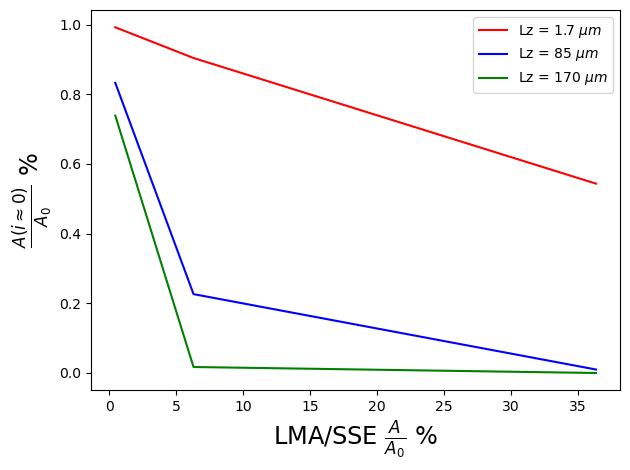

In [8]:
fig, ax = plt.subplots()
colors = {'r': 1.7, 'b': 85, 'g': 170}
data_arr = np.array(df.to_numpy(), dtype=float)
for c, v in colors.items():
    data = data_arr[np.isclose(data_arr[:, 0], v), :]
    ax.plot(data[:, 1], data[:, 2]/100, color=c, label=f'Lz = {v} ' + r'$\mu m$')
ax.set_xlabel(r'LMA/SSE $\frac{A}{A_0}$ %', fontsize='xx-large')
ax.set_ylabel(r'$\frac{A(i \approx 0)}{A_0}$ %', fontsize='xx-large')
ax.legend()
plt.tight_layout()
plt.savefig(f'figures/current_density_zero_right.png', dpi=1500)

1 0.009663419706631983 0.09271902553209613
5 0.04416395165383629 0.059767878409980595
15 0.04407158221912227 0.02738881868076274
30 0.050045838933828676 0.01052468434686087
50 0.057091406736180926 0.008043498248662566
100 0.06089272665797942 0.0


/tmp/ipykernel_2130784/4110788746.py:18: RuntimeWarning: divide by zero encountered in divide
  z_right = (final[:, 0] - mu_right) / sd_right
/tmp/ipykernel_2130784/4110788746.py:18: RuntimeWarning: invalid value encountered in divide
  z_right = (final[:, 0] - mu_right) / sd_right


1 0.058919514118749836 1.265543895402683
5 0.1413498568579001 1.106036422556444
15 0.39047773664092594 0.8530537247103234
30 0.5229858270078341 0.6387319349611102
50 0.6313675337130337 0.4611944373966868
100 0.7576949402304419 0.24371720277323483
1 0.10810750141005251 3.6372419806692555
5 0.18667438533634717 3.053547090278178
15 0.5513305394946427 2.075855203365332
30 0.7245576865647703 1.5028093198500372
50 0.7999150507012404 1.1677294250018546
100 0.8911444031999551 0.6231694918294864
1 0.1651498216671306 12.681734543275802
15 0.4020577729373308 3.029695564748523
30 0.4273809889657293 1.598694659131359
50 0.4484559718707793 2.0170795228823986
100 0.4302568494776952 1.0960790739286221


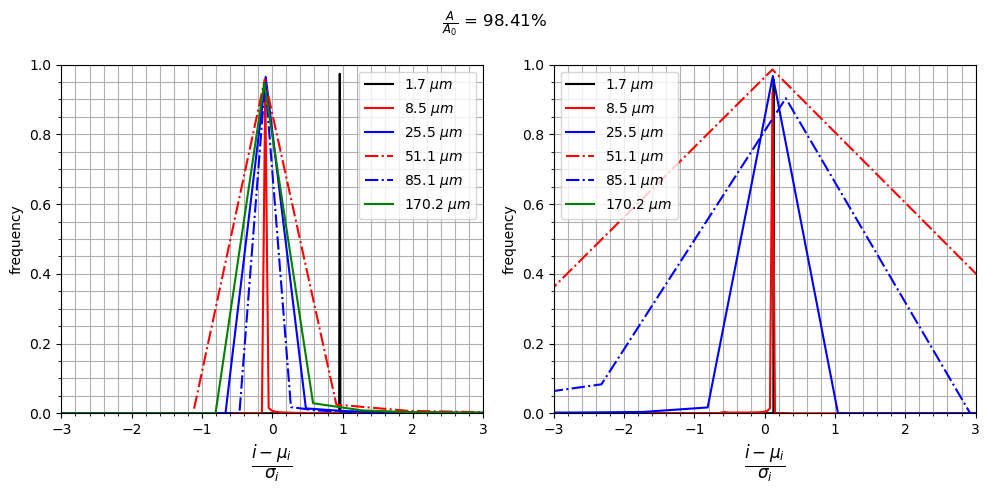

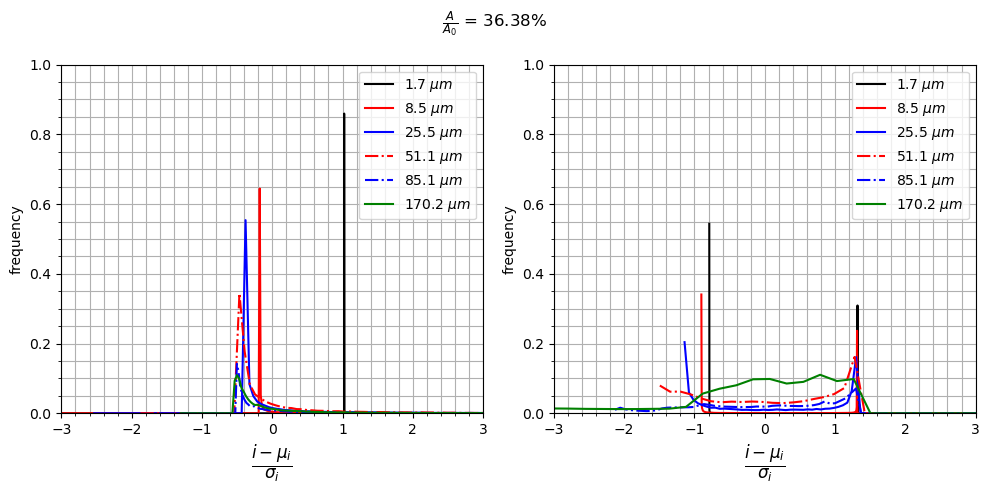

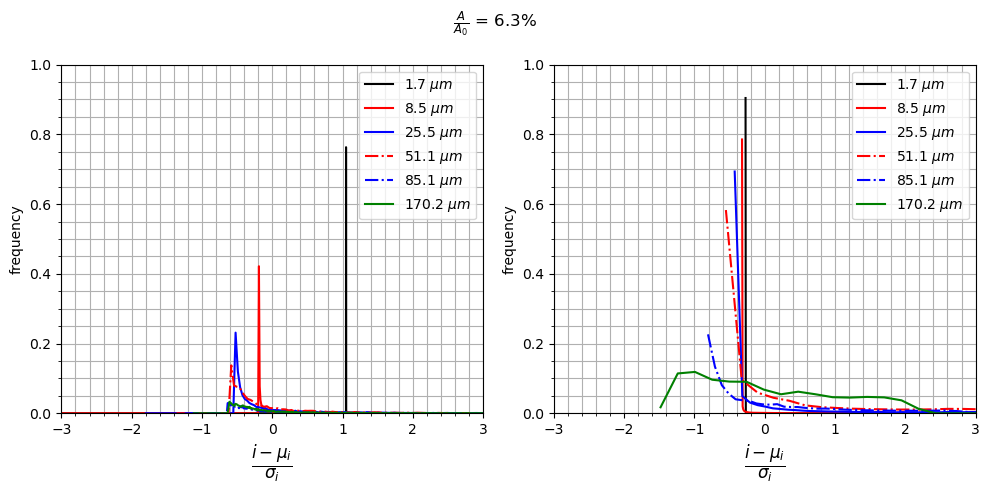

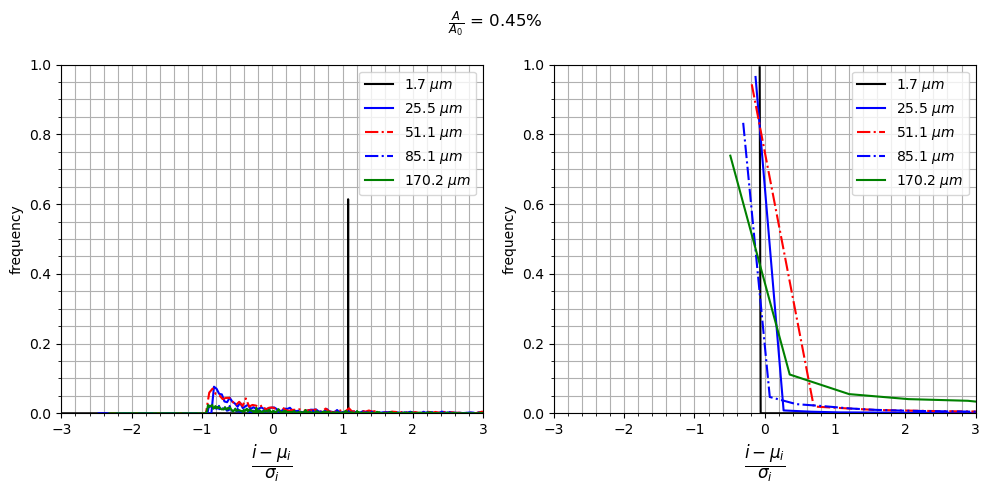

In [19]:
image_ids = [6, 11, 16, 22]
lengths = [1, 5, 15, 30, 50, 100]
moments_data = []
styles = ['k-', 'r-', 'b-', 'r-.', 'b-.', 'g-']
for img_id in image_ids:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(r'$\frac{A}{A_0}$' + f' = {area_fractions[img_id]}%')
    for idx, Lz in enumerate([1, 5, 15, 30, 50, 100]):
        try:
            stats, final = moments(img_id, Lz)
        except FileNotFoundError:
            continue
        mu_left = stats['mu_left']
        sd_left = stats['sd_left']
        mu_right = stats['mu_right']
        sd_right = stats['sd_right']
        z_left = (final[:, 0] - mu_left) / sd_left
        z_right = (final[:, 0] - mu_right) / sd_right
        moments_data.append((Lz, img_id, mu_left, sd_left, mu_right, sd_right))
        print(Lz, sd_left/mu_left, sd_right/mu_right)
        ax[0].plot(z_left, final[:, 1], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
        ax[1].plot(z_right, final[:, 2], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
    ax[0].set_xlim([-3, 3])
    ax[1].set_xlim([-3, 3])
    ax[0].set_ylim([0, 1])
    ax[1].set_ylim([0, 1])
    ax[0].grid(True, which='both');
    ax[0].minorticks_on();
    ax[1].grid(True, which='both');
    ax[1].minorticks_on();
    ax[0].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
    ax[1].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
    ax[0].set_ylabel('frequency')
    ax[1].set_ylabel('frequency')
    # fig.legend(['left', 'right'])
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.savefig(f'figures/current-density-moments-image-{img_id}.png', dpi=1500)

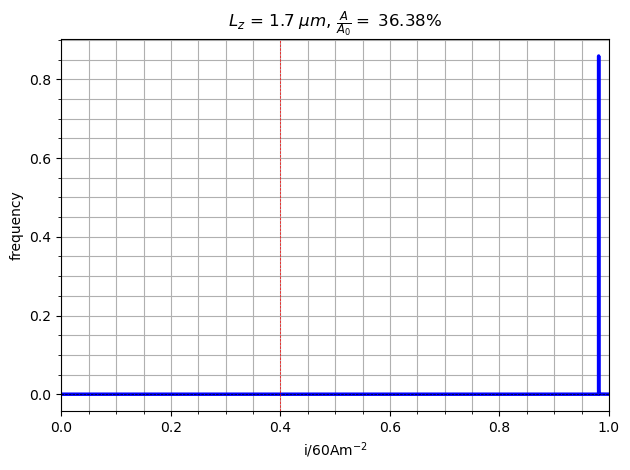

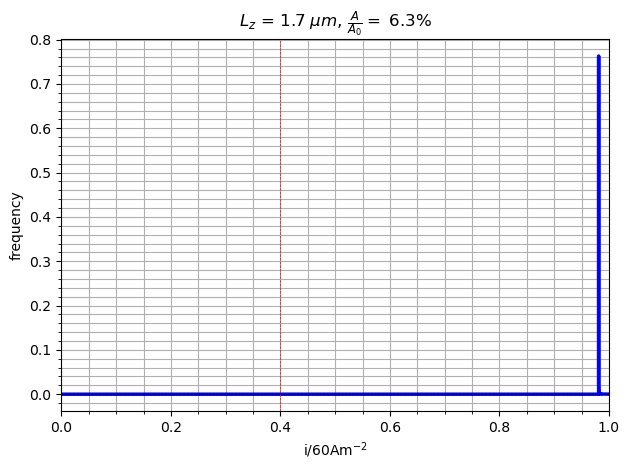

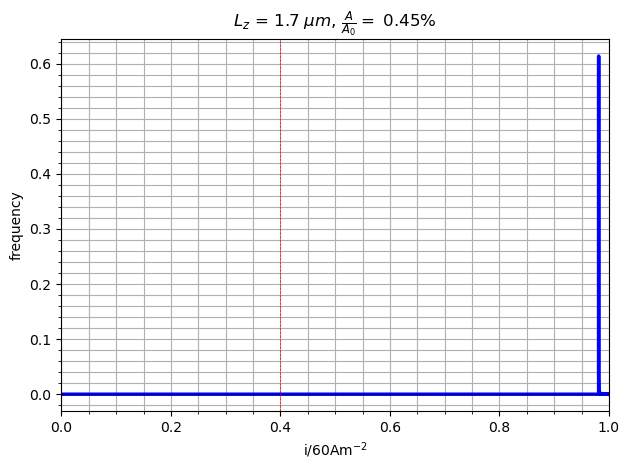

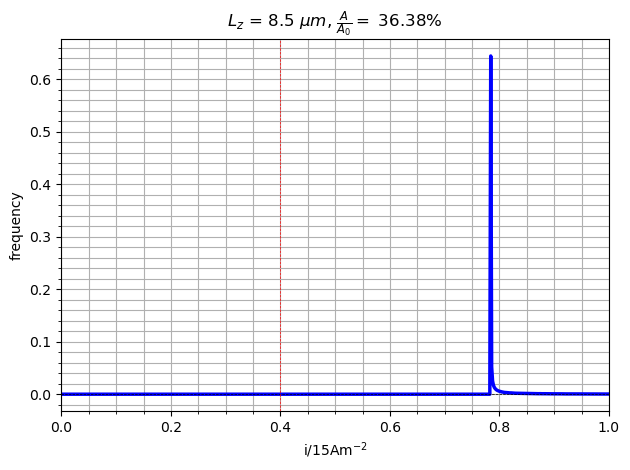

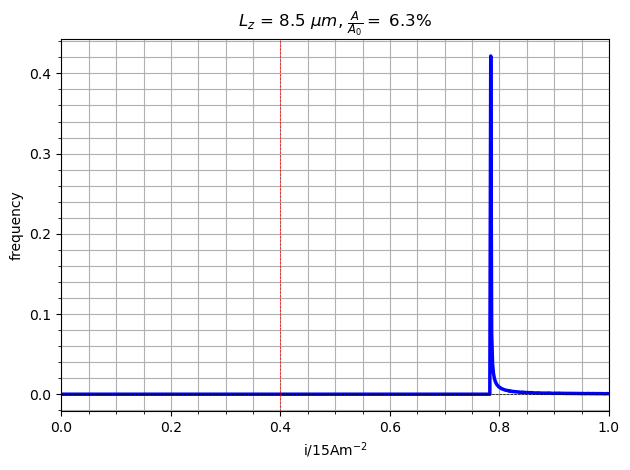

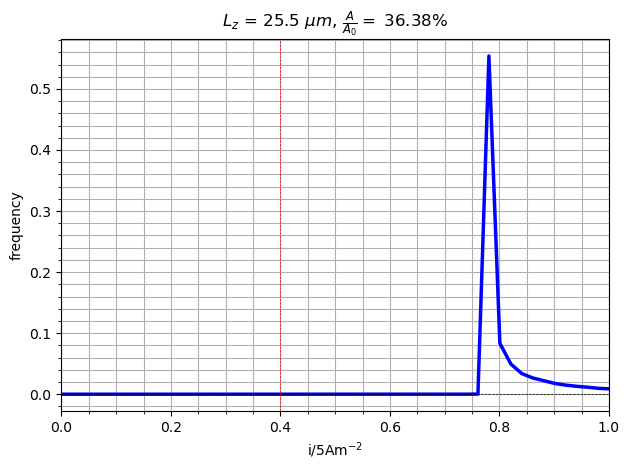

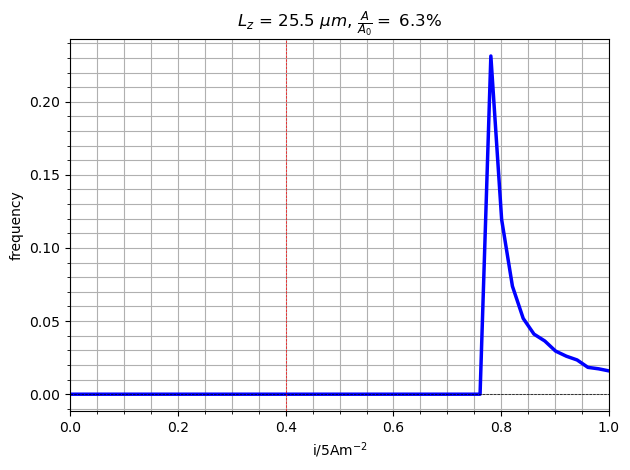

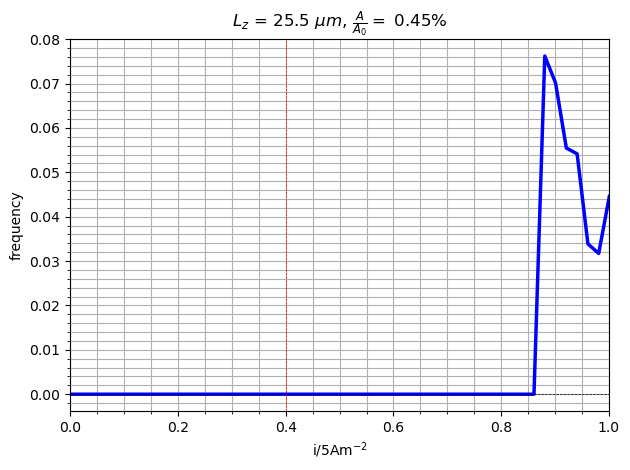

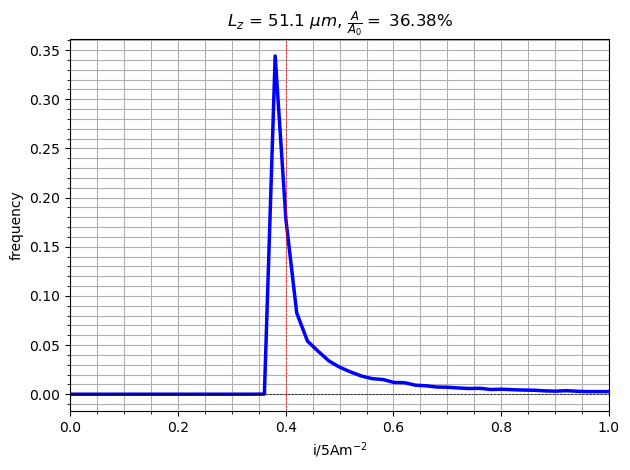

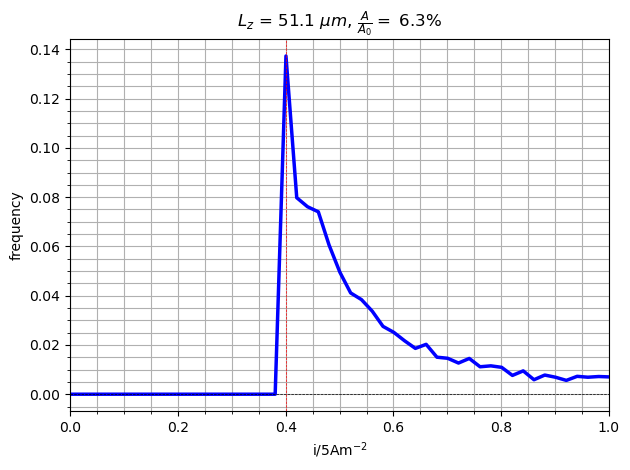

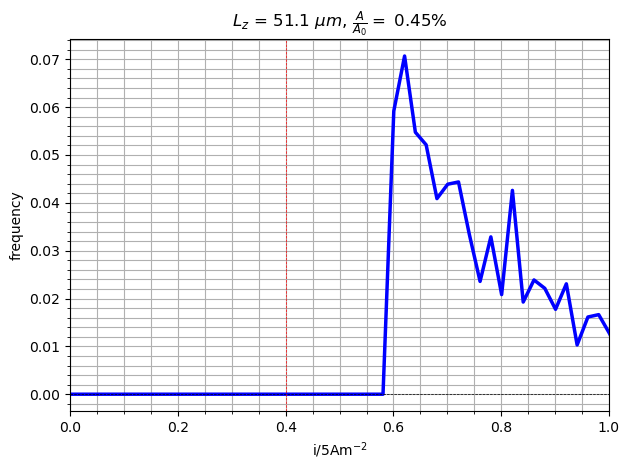

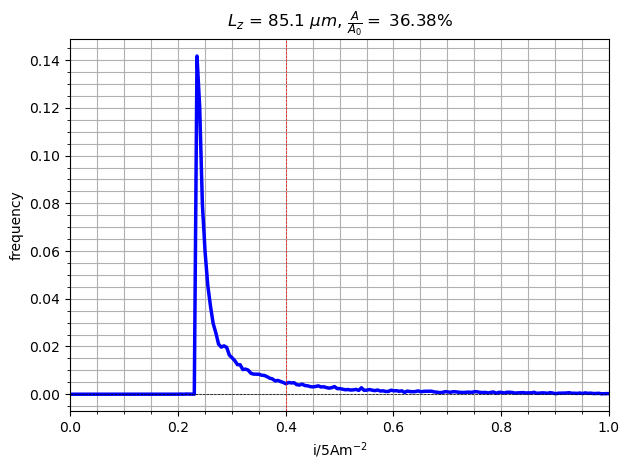

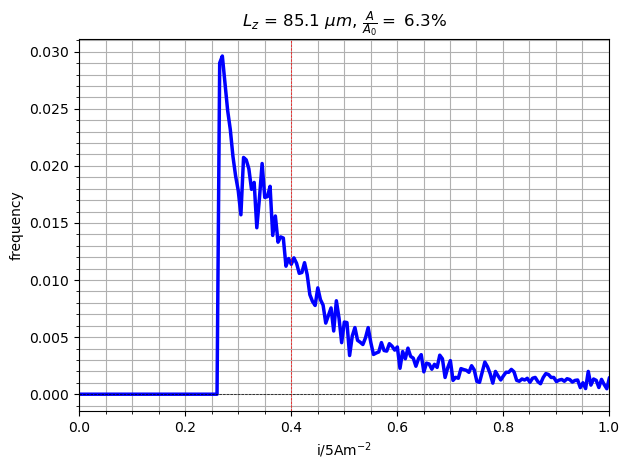

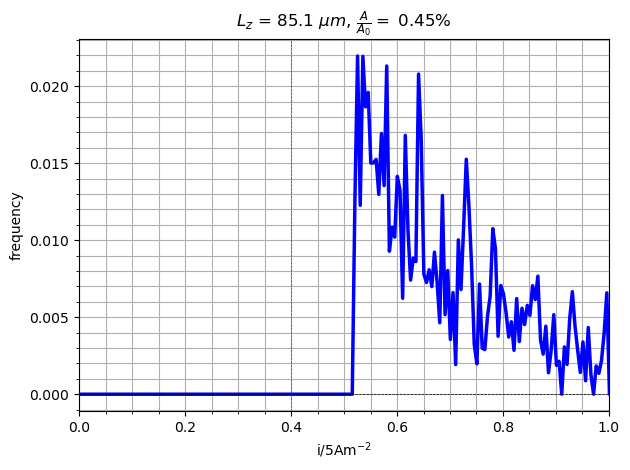

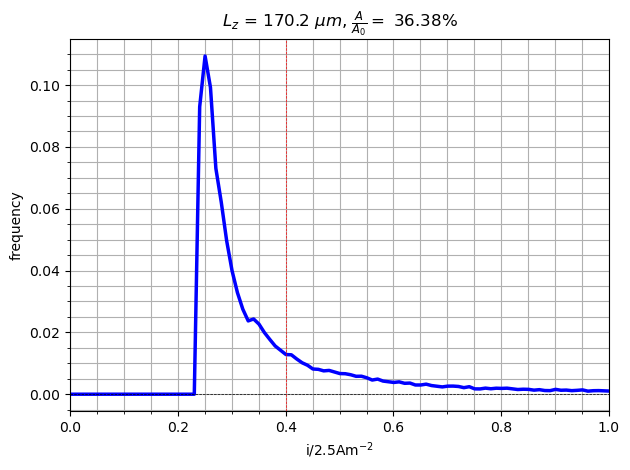

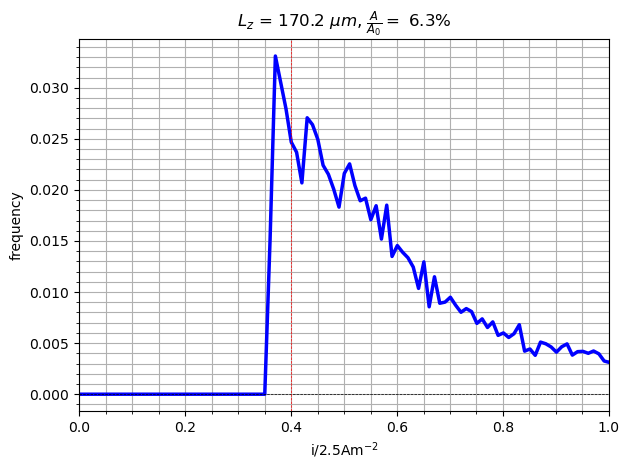

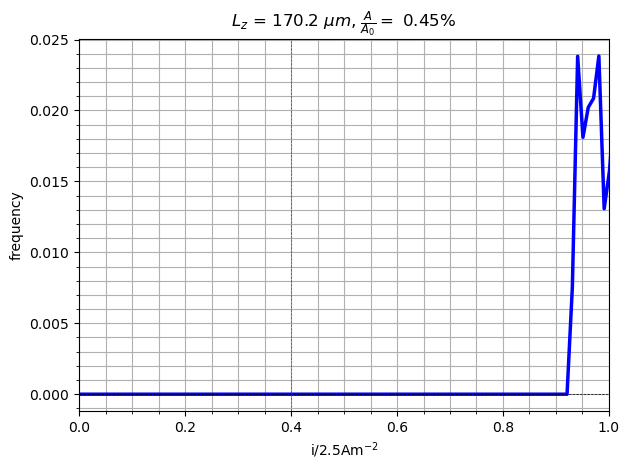

In [10]:
for Lz in [1, 5, 15, 30, 50, 100]:
    for img_id in [11, 16, 22]:
        try:
            make_plot_left(img_id, Lz)
        except Exception as e:
            print(f"No data for Lz = {Lz} and image id = {img_id}")
            continue

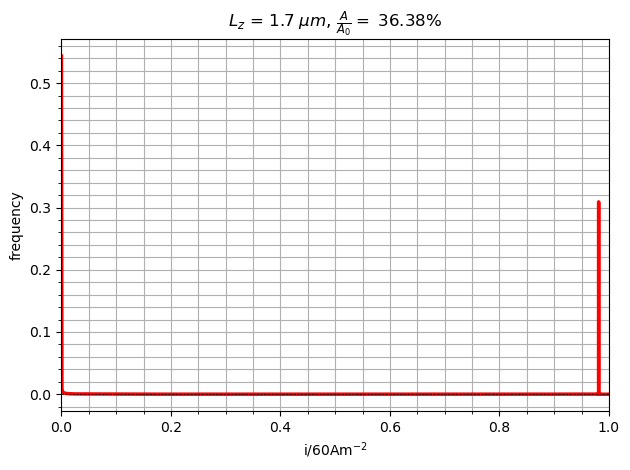

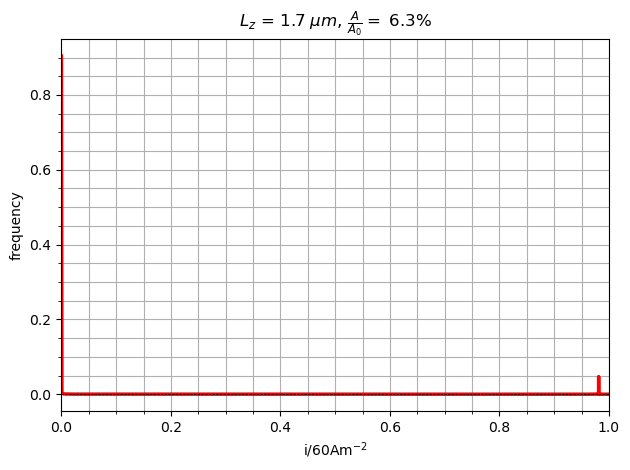

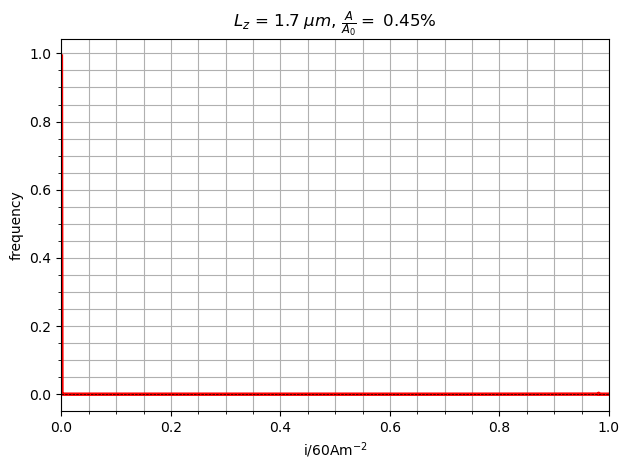

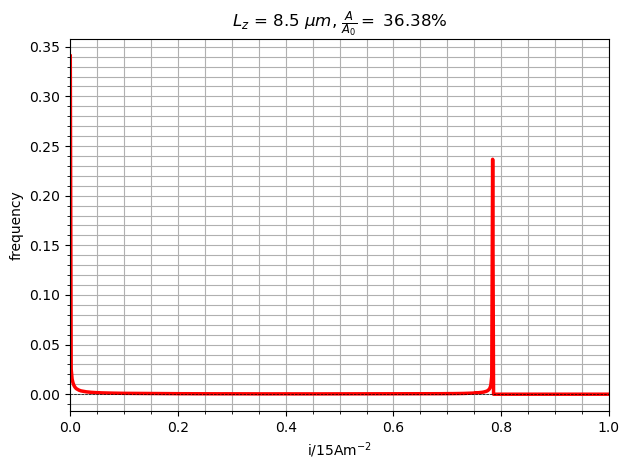

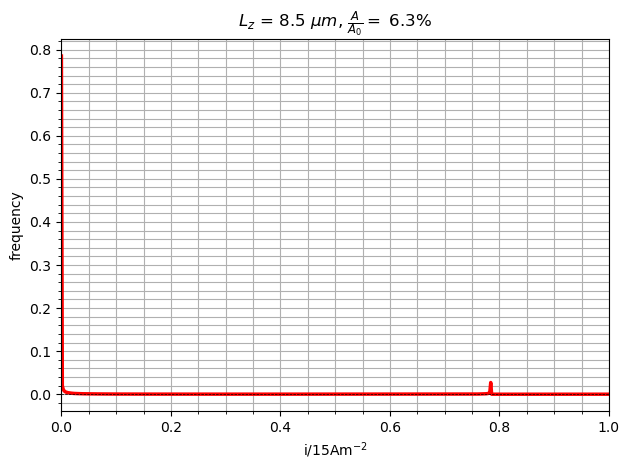

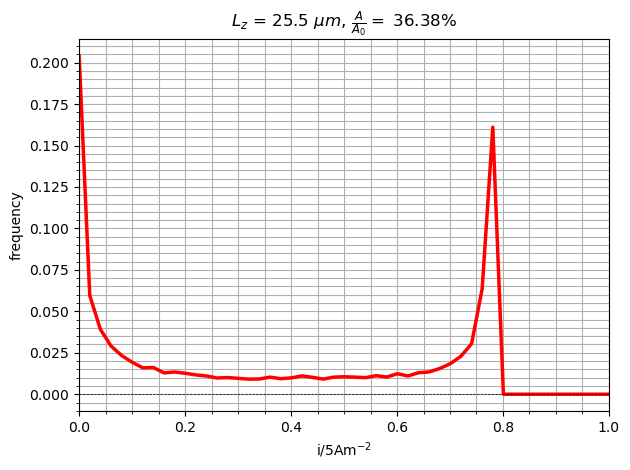

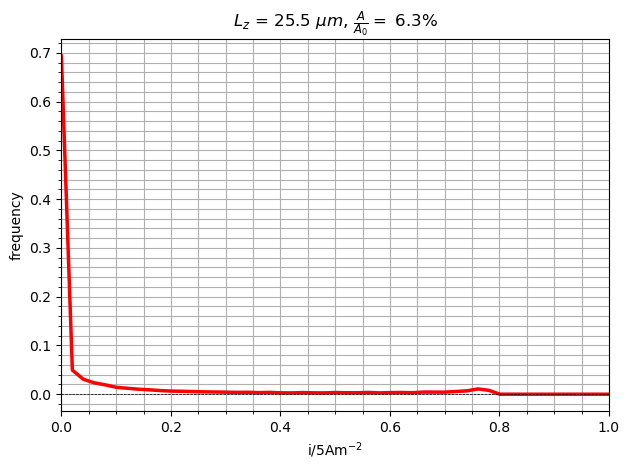

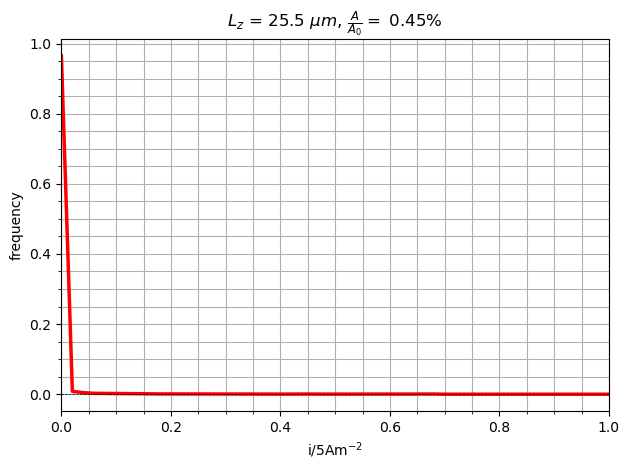

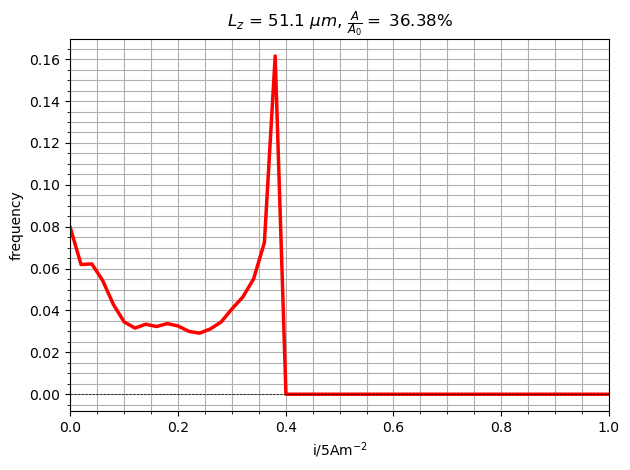

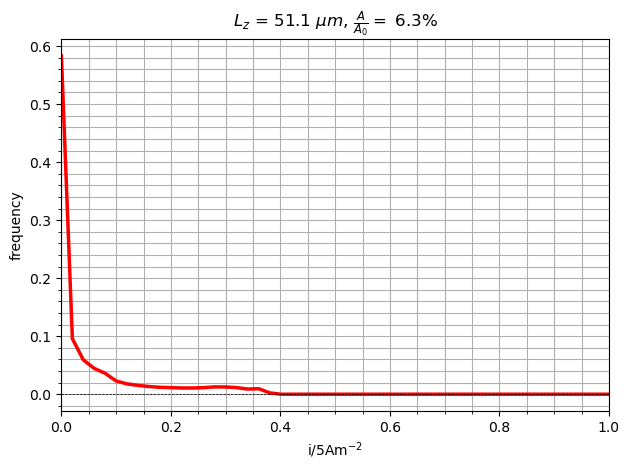

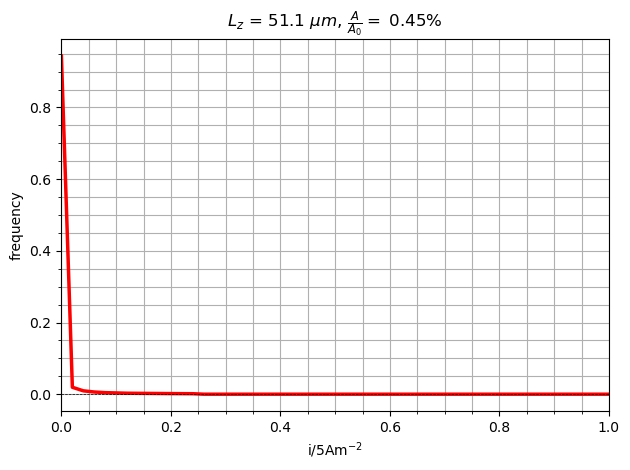

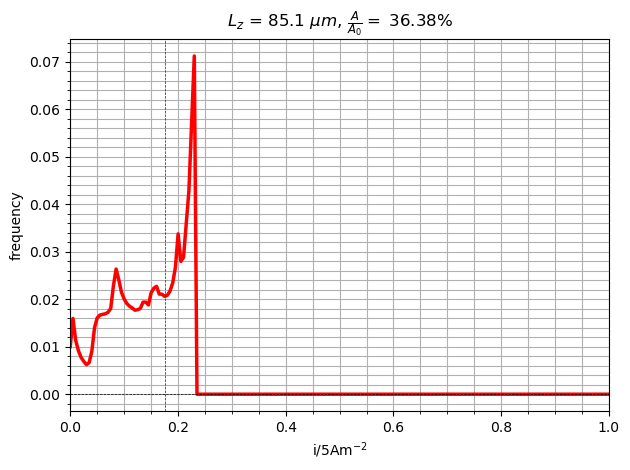

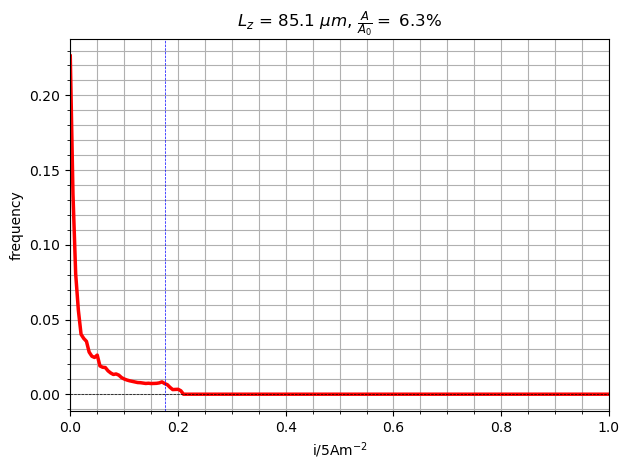

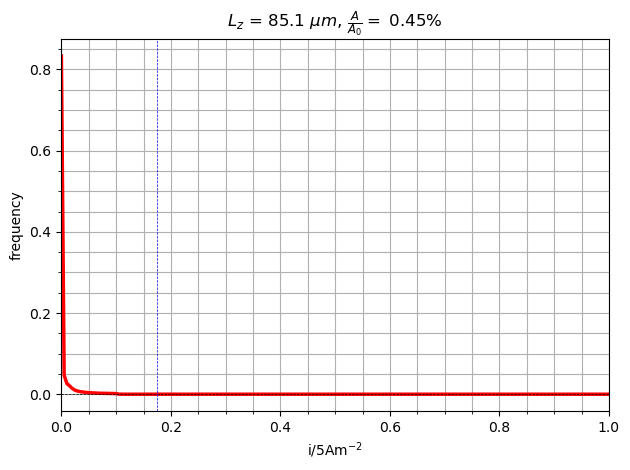

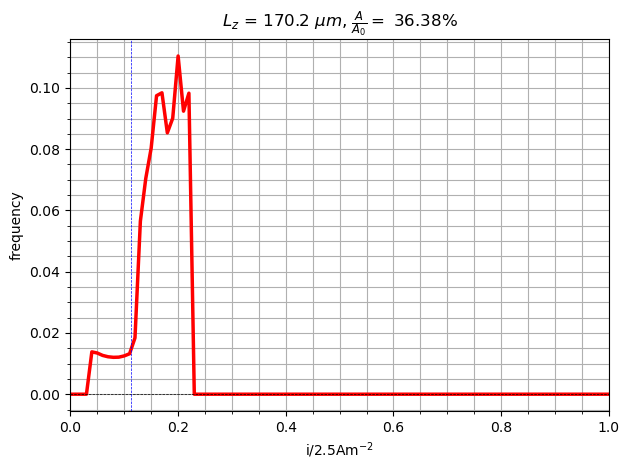

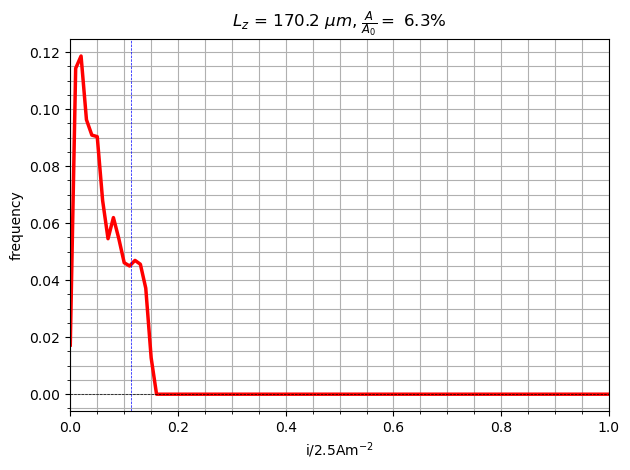

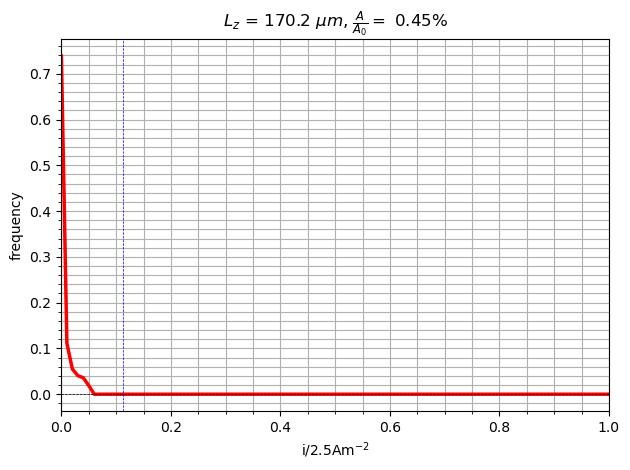

In [11]:
for Lz in [1, 5, 15, 30, 50, 100]:
    for img_id in [11, 16, 22]:
        # try:
        make_plot_right(img_id, Lz)
        # except Exception as e:
        #     print(f"No data for Lz = {Lz} and image id = {img_id}")
        #     continue